In [1]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from pyobsbox import ObsBoxGenerator

from paths import metadata_folder

# Logging

Set the logging level to debug.

In [2]:
logging.getLogger("pyobsbox").setLevel(logging.DEBUG)

# Metadata

Let's load the metadata.

In [3]:
list(metadata_folder.glob("metadata_*"))

[PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2H_Inst_23528.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_32.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_1024.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_34994.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1V_Inst_51335.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2V_Inst_60652.h5')]

In [4]:
metadata = metadata_folder / "metadata_B1H_Inst_1024.h5"

In [5]:
meta_df = pd.read_hdf(metadata)

In [6]:
meta_df.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
0,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,0.0,0.0,65536
1,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,550.0,1.0,65536
2,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,650.0,2.0,65536
3,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,750.0,3.0,65536
4,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,850.0,4.0,65536


# Generator

Create the generator.

In [7]:
generator = ObsBoxGenerator(meta_df, n_bunches=1, sequence_length=2048, shuffle=False, normalization="jorg")

Jan/19 17:20:25 pyobsbox.generator DEBUG: Normalization method: <bound method ObsBoxGenerator._jorg of <pyobsbox.generator.ObsBoxGenerator object at 0x7f3ea6aa9358>>
Jan/19 17:20:25 pyobsbox.generator INFO: Completing 'batch_size'.
Jan/19 17:20:25 pyobsbox.generator INFO: metadata_path: None
Jan/19 17:20:25 pyobsbox.generator INFO: shuffle: False
Jan/19 17:20:25 pyobsbox.generator INFO: batch_size: 32
Jan/19 17:20:25 pyobsbox.generator INFO: sequence_length: 2048
Jan/19 17:20:25 pyobsbox.generator INFO: n_bunches: 1
Jan/19 17:20:25 pyobsbox.generator INFO: __len__: 369627
Jan/19 17:20:25 pyobsbox.generator INFO: fetched_log_folder: None
Jan/19 17:20:25 pyobsbox.generator INFO: fetched_log_prefix: 


# Preprocessing steps

In [8]:
subset = generator._create_subset(0)
subset

Jan/19 17:20:26 pyobsbox.generator DEBUG: Subset indices: [0]


,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
0,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,0.0,0.0,65536


In [9]:
raw = generator._load(subset)
raw.shape

Jan/19 17:20:26 pyobsbox.generator DEBUG: Opening 1 files.
Jan/19 17:20:26 pyobsbox.generator DEBUG: Opening /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/instability_data/06817_Inst_B1H_Q7_20180618_00h26m52s.h5
Jan/19 17:20:26 pyobsbox.generator DEBUG: Loading 1 bunches.


(65536, 1)

In [10]:
split = generator._split(raw.copy())
split.shape

Jan/19 17:20:26 pyobsbox.generator DEBUG: Pre-split: (65536, 1)
Jan/19 17:20:26 pyobsbox.generator DEBUG: Post-split: (32, 2048)


(32, 2048)

In [11]:
normed = generator.normalization_method(split.copy())
normed.shape

Jan/19 17:20:26 pyobsbox.generator DEBUG: Scale factor: 60


(32, 2048, 1)

The `generator.__getitem__` method does all these steps.

In [12]:
np.allclose(normed, generator[0])

Jan/19 17:20:26 pyobsbox.generator DEBUG: Started fetching index 0.
Jan/19 17:20:26 pyobsbox.generator DEBUG: Subset indices: [0]
Jan/19 17:20:26 pyobsbox.generator DEBUG: Opening 1 files.
Jan/19 17:20:26 pyobsbox.generator DEBUG: Opening /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/instability_data/06817_Inst_B1H_Q7_20180618_00h26m52s.h5
Jan/19 17:20:26 pyobsbox.generator DEBUG: Loading 1 bunches.
Jan/19 17:20:26 pyobsbox.generator DEBUG: Pre-split: (65536, 1)
Jan/19 17:20:26 pyobsbox.generator DEBUG: Post-split: (32, 2048)
Jan/19 17:20:26 pyobsbox.generator DEBUG: Scale factor: 60
Jan/19 17:20:26 pyobsbox.generator DEBUG: Data final shape: (32, 2048, 1)
Jan/19 17:20:26 pyobsbox.generator DEBUG: Finished fetching index 0.


True

# Vizualize raw data

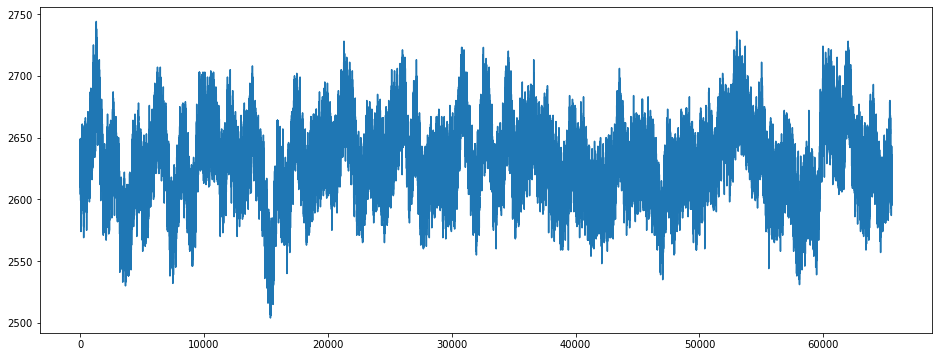

In [13]:
fig = plt.figure(figsize=(16, 6))
plt.plot(raw[:, 0]);

# Vizualize split data

All the splits concatenated, make sure we are not missing anything

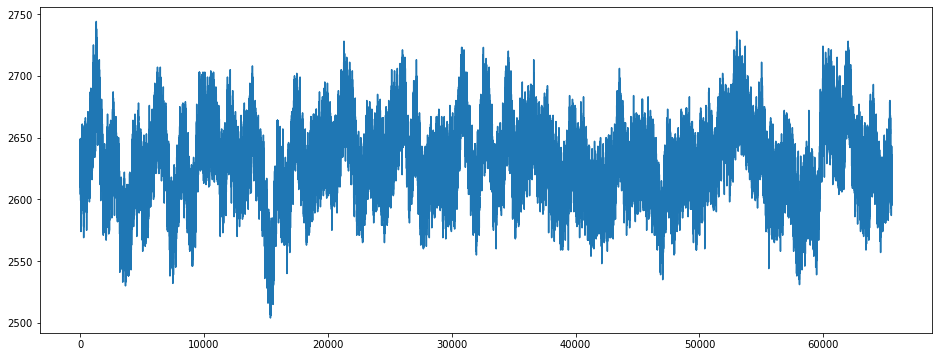

In [14]:
fig = plt.figure(figsize=(16, 6))
plt.plot(np.hstack(split));

The splits.

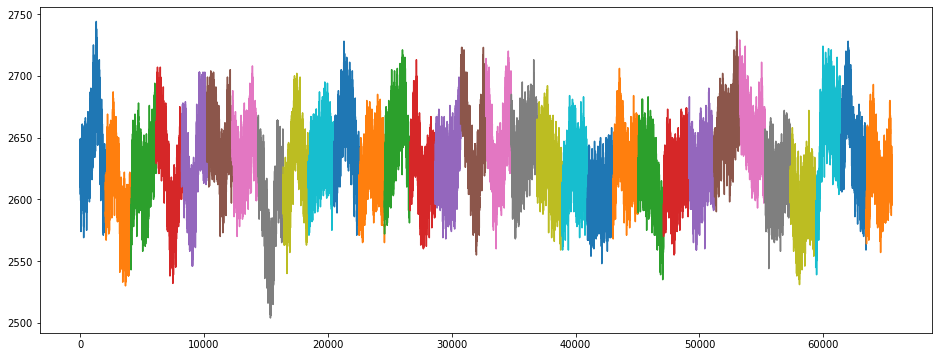

In [15]:
fig = plt.figure(figsize=(16, 6))
for i, data_split in enumerate(split):
    plt.plot(range(i * generator.sequence_length, (i + 1) * generator.sequence_length), data_split)

# Vizualize znorm data

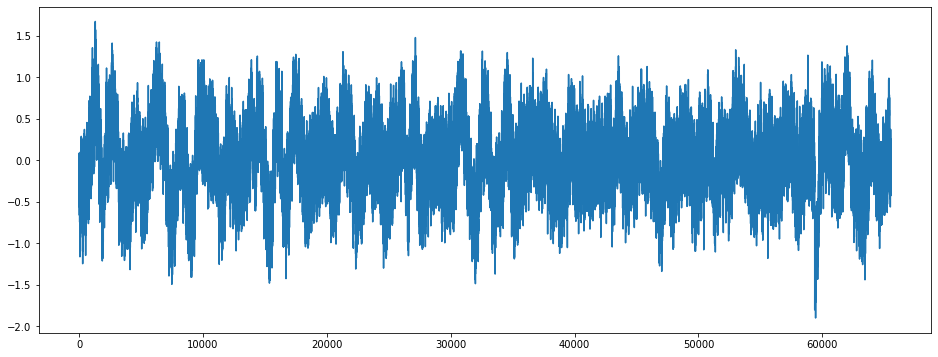

In [16]:
fig = plt.figure(figsize=(16, 6))
plt.plot(np.hstack(normed.squeeze()));

Each split of the timeseries should have a mean 0 and std 1.

In [17]:
normed.mean(axis=1)

array([[ 1.38777878e-17],
       [ 0.00000000e+00],
       [ 1.38777878e-17],
       [ 0.00000000e+00],
       [ 2.77555756e-17],
       [-1.38777878e-17],
       [-1.38777878e-17],
       [-2.77555756e-17],
       [ 2.77555756e-17],
       [ 0.00000000e+00],
       [ 2.08166817e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.38777878e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.38777878e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-3.46944695e-18],
       [-6.93889390e-18],
       [-2.77555756e-17],
       [-6.93889390e-18],
       [-1.38777878e-17],
       [ 1.38777878e-17],
       [ 0.00000000e+00],
       [-6.93889390e-18],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 2.77555756e-17],
       [-1.38777878e-17]])

In [18]:
normed.std(axis=1)

array([[0.54724554],
       [0.49377063],
       [0.41441203],
       [0.60075588],
       [0.56836459],
       [0.4165393 ],
       [0.37072394],
       [0.55738274],
       [0.50357792],
       [0.35365336],
       [0.45620266],
       [0.36097385],
       [0.44039608],
       [0.4257023 ],
       [0.37815035],
       [0.56463313],
       [0.47538279],
       [0.3797318 ],
       [0.37973127],
       [0.35450772],
       [0.30639707],
       [0.38043073],
       [0.45817433],
       [0.34233046],
       [0.35020581],
       [0.39933001],
       [0.41120488],
       [0.33302623],
       [0.34258027],
       [0.55556049],
       [0.51889209],
       [0.3769196 ]])